In [60]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [61]:
c_data = pd.read_csv('JoinedData_FromQGIS.csv')
c_data.head()

,Case Numbe,Race,Latino,Gender,Age,No. of Dep,Disability,Income Gro,Type of Ca,Threats of,...,OBJECTID,GEOID,STATE,COUNTY_FIP,TRACT,Shape__Are,Shape__Len,TDP,TDP_NORM,geometry
0,36524,Asian,0,Male,47,0,None,Extremely Low Income,Legal Consultation,Unlawful Detainer,...,3.0,6.001400e+09,6.0,1.0,400300.0,0.000113,0.056087,0.989983,0.279957,37.8381787 -122.2621815
1,38352,Other,1,Female,42,0,No Answer,Very Low Income,Legal Consultation,Notice of termination of tenancy,...,5.0,6.001400e+09,6.0,1.0,400500.0,0.000060,0.033135,1.110478,0.314031,37.850362 -122.26664
2,36449,Black/African American,0,Male,42,0,None,Extremely Low Income,Legal rep accepted,Unlawful Detainer,...,7.0,6.001401e+09,6.0,1.0,400700.0,0.000090,0.042525,1.871907,0.529355,37.83953497 -122.2714426
3,36830,Black/African American,0,Female,64,0,Physical,Extremely Low Income,Legal Consultation,Notice of termination of tenancy; Repairs nece...,...,7.0,6.001401e+09,6.0,1.0,400700.0,0.000090,0.042525,1.871907,0.529355,37.84149395 -122.2682927
4,39150,Asian,0,Female,58,0,None,Extremely Low Income,Legal Consultation,Unfair or illegal behavior by landlord,...,7.0,6.001401e+09,6.0,1.0,400700.0,0.000090,0.042525,1.871907,0.529355,37.83887416 -122.270456


In [62]:
len(c_data)

482

In [63]:
c_data = c_data.dropna()

In [64]:
len(c_data)

465

In [65]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [66]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 464
Data columns (total 22 columns):
Case Numbe    465 non-null int64
Race          465 non-null object
Latino        465 non-null int64
Gender        465 non-null object
Age           465 non-null int64
No. of Dep    465 non-null int64
Disability    465 non-null object
Income Gro    465 non-null object
Type of Ca    465 non-null object
Threats of    465 non-null object
Latitude      465 non-null float64
Longitude     465 non-null float64
OBJECTID      465 non-null float64
GEOID         465 non-null float64
STATE         465 non-null float64
COUNTY_FIP    465 non-null float64
TRACT         465 non-null float64
Shape__Are    465 non-null float64
Shape__Len    465 non-null float64
TDP           465 non-null float64
TDP_NORM      465 non-null float64
geometry      465 non-null object
dtypes: float64(11), int64(4), object(7)
memory usage: 83.6+ KB


In [67]:
geometry = [Point(xy) for xy in zip(c_data.Longitude, c_data.Latitude)]

crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(c_data, crs=crs, geometry=geometry)

In [68]:
gdf

,Case Numbe,Race,Latino,Gender,Age,No. of Dep,Disability,Income Gro,Type of Ca,Threats of,...,OBJECTID,GEOID,STATE,COUNTY_FIP,TRACT,Shape__Are,Shape__Len,TDP,TDP_NORM,geometry
0,36524,Asian,0,Male,47,0,None,Extremely Low Income,Legal Consultation,Unlawful Detainer,...,3.0,6.001400e+09,6.0,1.0,400300.0,0.000113,0.056087,0.989983,0.279957,POINT (-122.2621815 37.8381787)
1,38352,Other,1,Female,42,0,No Answer,Very Low Income,Legal Consultation,Notice of termination of tenancy,...,5.0,6.001400e+09,6.0,1.0,400500.0,0.000060,0.033135,1.110478,0.314031,POINT (-122.26664 37.850362)
2,36449,Black/African American,0,Male,42,0,None,Extremely Low Income,Legal rep accepted,Unlawful Detainer,...,7.0,6.001401e+09,6.0,1.0,400700.0,0.000090,0.042525,1.871907,0.529355,POINT (-122.2714426 37.83953497)
3,36830,Black/African American,0,Female,64,0,Physical,Extremely Low Income,Legal Consultation,Notice of termination of tenancy; Repairs nece...,...,7.0,6.001401e+09,6.0,1.0,400700.0,0.000090,0.042525,1.871907,0.529355,POINT (-122.2682927 37.84149395)
4,39150,Asian,0,Female,58,0,None,Extremely Low Income,Legal Consultation,Unfair or illegal behavior by landlord,...,7.0,6.001401e+09,6.0,1.0,400700.0,0.000090,0.042525,1.871907,0.529355,POINT (-122.270456 37.83887416)
5,38367,Black/African American,0,Male,38,1,No Answer,Extremely Low Income,Legal Consultation,Landlord harassment,...,8.0,6.001401e+09,6.0,1.0,400800.0,0.000071,0.039996,1.593865,0.450728,POINT (-122.2820874 37.84650294)
6,39143,Black/African American,0,Male,61,0,None,Very Low Income,Legal Consultation,Rent increase,...,8.0,6.001401e+09,6.0,1.0,400800.0,0.000071,0.039996,1.593865,0.450728,POINT (-122.285001 37.84806063)
7,39168,Black/African American,0,Female,39,0,None,Income not categorized (Client income zero),Legal Consultation,Unfair or illegal behavior by landlord,...,8.0,6.001401e+09,6.0,1.0,400800.0,0.000071,0.039996,1.593865,0.450728,POINT (-122.2819483 37.84338458)
8,38228,Black/African American,0,Male,64,0,None,Low Income,Legal rep ongoing,Foreclosure,...,9.0,6.001401e+09,6.0,1.0,400900.0,0.000043,0.029116,1.636636,0.462823,POINT (-122.2790091 37.83807178)
9,36433,Black/African American,0,Female,50,0,None,Extremely Low Income,Legal Consultation,Unlawful Detainer,...,10.0,6.001401e+09,6.0,1.0,401000.0,0.000117,0.046801,2.123567,0.600522,POINT (-122.2706262 37.82642427)


In [69]:
one_point = c_data.geometry [0]

type(one_point)

shapely.geometry.point.Point

In [70]:
print(one_point.x)
print(one_point.y)

-122.2621815
37.8381787


In [71]:
tracts_shp = gpd.read_file('Oakland_Community_of_Concern_2012-2016_ACS.dbf')

In [72]:
tracts_shp.head()

,objectid,county_fip,tract,tot_pop_mi,tot_pop_se,tot_pop_po,tot_pop_ci,tot_hh,tot_fam,tot_pop_ov,...,below200_h,zvhh_halfs,hus_rent50,count_disa,geoid,coc_class,coc_flag,Shape__Are,Shape__Len,geometry
0,1,1,442700,3227,3227,3227,3227,1037,856,3009,...,0,0,0,0,06001442700,NA,0,0.000126,0.048946,"POLYGON ((-122.005350074 37.539897997, -122.00..."
1,2,1,442800,3051,3051,3024,3051,925,715,2840,...,0,0,0,0,06001442800,NA,0,0.000130,0.049210,"POLYGON ((-121.98305707 37.5284419970001, -121..."
2,3,1,442900,8069,8069,8064,8064,2354,1892,7598,...,0,0,0,0,06001442900,NA,0,0.000211,0.068034,"POLYGON ((-121.969014067 37.522488998, -121.96..."
3,4,1,443001,2906,2906,2887,2906,833,709,2790,...,0,0,0,1,06001443001,NA,0,0.000078,0.039225,"POLYGON ((-121.945329062 37.512783998, -121.94..."
4,5,1,443002,6589,6589,6570,6589,1887,1632,6255,...,0,0,0,0,06001443002,NA,0,0.000161,0.051727,"POLYGON ((-121.951183062 37.512103998, -121.95..."


In [73]:
list(tracts_shp)

['objectid',
 'county_fip',
 'tract',
 'tot_pop_mi',
 'tot_pop_se',
 'tot_pop_po',
 'tot_pop_ci',
 'tot_hh',
 'tot_fam',
 'tot_pop_ov',
 'pop_minori',
 'pop_over75',
 'pop_spfam',
 'pop_lep',
 'pop_below2',
 'pop_disabi',
 'pop_hus_re',
 'pop_zvhhs',
 'pct_over75',
 'pct_minori',
 'pct_spfam',
 'pct_lep',
 'pct_below2',
 'pct_disab',
 'pct_zvhhs',
 'pct_hus_re',
 'minority_h',
 'spfam_half',
 'disab_half',
 'lep_halfsd',
 'below200_h',
 'zvhh_halfs',
 'hus_rent50',
 'count_disa',
 'geoid',
 'coc_class',
 'coc_flag',
 'Shape__Are',
 'Shape__Len',
 'geometry']

In [74]:
tracts_shp.drop(['tot_pop_mi',
 'tot_pop_se',
 'tot_pop_po',
 'tot_pop_ci',
 'tot_hh',
 'tot_fam',
 'tot_pop_ov',
 'pop_minori',
 'pop_over75',
 'pop_spfam',
 'pop_lep',
 'pop_below2',
 'pop_disabi',
 'pop_hus_re',
 'pop_zvhhs',
 'pct_over75',
 'pct_minori',
 'pct_spfam',
 'pct_lep',
 'pct_below2',
 'pct_disab',
 'pct_zvhhs',
 'pct_hus_re',
 'minority_h',
 'spfam_half',
 'disab_half',
 'lep_halfsd',
 'below200_h',
 'zvhh_halfs',
 'hus_rent50',
 'count_disa'],axis = 1, inplace = True)

In [75]:
tracts_shp.crs

{'init': 'epsg:4326'}

In [76]:
gdf.crs 

{'init': 'epsg:4326'}

In [77]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 465 entries, 0 to 464
Data columns (total 22 columns):
Case Numbe    465 non-null int64
Race          465 non-null object
Latino        465 non-null int64
Gender        465 non-null object
Age           465 non-null int64
No. of Dep    465 non-null int64
Disability    465 non-null object
Income Gro    465 non-null object
Type of Ca    465 non-null object
Threats of    465 non-null object
Latitude      465 non-null float64
Longitude     465 non-null float64
OBJECTID      465 non-null float64
GEOID         465 non-null float64
STATE         465 non-null float64
COUNTY_FIP    465 non-null float64
TRACT         465 non-null float64
Shape__Are    465 non-null float64
Shape__Len    465 non-null float64
TDP           465 non-null float64
TDP_NORM      465 non-null float64
geometry      465 non-null object
dtypes: float64(11), int64(4), object(7)
memory usage: 103.6+ KB


In [78]:
tracts_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
objectid      360 non-null int64
county_fip    360 non-null int64
tract         360 non-null int64
geoid         360 non-null object
coc_class     360 non-null object
coc_flag      360 non-null int64
Shape__Are    360 non-null float64
Shape__Len    360 non-null float64
geometry      360 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 25.4+ KB


In [79]:
#connects left geodataframe (cases) and finds each point within census tract shape file (right)
merged = gpd.sjoin(gdf, tracts_shp, how="left", op='within')

In [80]:
merged.head()

,Case Numbe,Race,Latino,Gender,Age,No. of Dep,Disability,Income Gro,Type of Ca,Threats of,...,geometry,index_right,objectid,county_fip,tract,geoid,coc_class,coc_flag,Shape__Are_right,Shape__Len_right
0,36524,Asian,0,Male,47,0,None,Extremely Low Income,Legal Consultation,Unlawful Detainer,...,POINT (-122.2621815 37.8381787),190,474,1,400300,06001400300,NA,0,0.000113,0.056087
1,38352,Other,1,Female,42,0,No Answer,Very Low Income,Legal Consultation,Notice of termination of tenancy,...,POINT (-122.26664 37.850362),119,358,1,400500,06001400500,NA,0,0.000060,0.033135
2,36449,Black/African American,0,Male,42,0,None,Extremely Low Income,Legal rep accepted,Unlawful Detainer,...,POINT (-122.2714426 37.83953497),176,445,1,400700,06001400700,Higher,1,0.000090,0.042525
3,36830,Black/African American,0,Female,64,0,Physical,Extremely Low Income,Legal Consultation,Notice of termination of tenancy; Repairs nece...,...,POINT (-122.2682927 37.84149395),176,445,1,400700,06001400700,Higher,1,0.000090,0.042525
4,39150,Asian,0,Female,58,0,None,Extremely Low Income,Legal Consultation,Unfair or illegal behavior by landlord,...,POINT (-122.270456 37.83887416),176,445,1,400700,06001400700,Higher,1,0.000090,0.042525


In [81]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 465 entries, 0 to 464
Data columns (total 31 columns):
Case Numbe          465 non-null int64
Race                465 non-null object
Latino              465 non-null int64
Gender              465 non-null object
Age                 465 non-null int64
No. of Dep          465 non-null int64
Disability          465 non-null object
Income Gro          465 non-null object
Type of Ca          465 non-null object
Threats of          465 non-null object
Latitude            465 non-null float64
Longitude           465 non-null float64
OBJECTID            465 non-null float64
GEOID               465 non-null float64
STATE               465 non-null float64
COUNTY_FIP          465 non-null float64
TRACT               465 non-null float64
Shape__Are_left     465 non-null float64
Shape__Len_left     465 non-null float64
TDP                 465 non-null float64
TDP_NORM            465 non-null float64
geometry            465 non-null object


In [82]:
#inplace=True means that it is permanently dropped
#merged.dropna(inplace = True)

In [83]:
cases_per_tract = merged.groupby('TRACT')['Case Numbe'].count()
cases_per_tract

TRACT
400300.0     1
400500.0     1
400700.0     3
400800.0     3
400900.0     1
401000.0     3
401100.0     2
401200.0     1
401300.0     1
401400.0    10
401500.0     4
401600.0     1
401700.0     1
401800.0     7
402200.0     3
402400.0     5
402500.0     2
402600.0     1
402700.0     2
402800.0    14
402900.0     2
403000.0     2
403100.0     2
403300.0     5
403400.0     2
403701.0     1
403702.0     1
403900.0     3
404000.0     1
404101.0     3
            ..
407300.0     9
407400.0     6
407500.0     5
407600.0     8
407700.0     2
407800.0     1
407900.0     4
408100.0     2
408200.0     8
408300.0     7
408400.0     7
408500.0    10
408600.0     7
408700.0    21
408800.0    12
408900.0     9
409000.0     3
409100.0     4
409200.0    10
409300.0    13
409400.0    13
409500.0    12
409600.0    12
409700.0     7
409800.0     2
410100.0     7
410200.0     8
410300.0     5
410400.0     4
410500.0     4
Name: Case Numbe, Length: 95, dtype: int64

In [84]:
df_cases = pd.DataFrame(cases_per_tract)
df_cases

,Case Numbe
TRACT,
400300.0,1
400500.0,1
400700.0,3
400800.0,3
400900.0,1
401000.0,3
401100.0,2
401200.0,1
401300.0,1


In [85]:
# Join these to create new dataframe, left join with shape file on left, join data to shape file, join casespertract to merged

#save cases_per_tract to a dataframe
# join cases per tract to census tract shapefile by tract ID
# loc[]

In [86]:
by_race = merged.groupby(['TRACT', 'Race']).size()
by_race

TRACT     Race                                    
400300.0  Asian                                        1
400500.0  Other                                        1
400700.0  Asian                                        1
          Black/African American                       2
400800.0  Black/African American                       3
400900.0  Black/African American                       1
401000.0  Black/African American                       2
          White                                        1
401100.0  Asian                                        1
          Black/African American                       1
401200.0  White                                        1
401300.0  Black/African American                       1
401400.0  Black/African American                       4
          Other                                        3
          Other and White                              1
          White                                        2
401500.0  Black/African American     

In [87]:
df_byrace = pd.DataFrame(by_race)
df_byrace

df_byrace.rename (columns = {'0' : 'Number_cases'}, inplace=True)


In [107]:
df_byrace.rename (columns = {'sdg' : 'Number_cases'}, inplace=True)
df_byrace

0
TRACT    Race                                        
400300.0 Asian                                      1
400500.0 Other                                      1
400700.0 Asian                                      1
         Black/African American                     2
400800.0 Black/African American                     3
400900.0 Black/African American                     1
401000.0 Black/African American                     2
         White                                      1
401100.0 Asian                                      1
         Black/African American                     1
401200.0 White                                      1
401300.0 Black/African American                     1
401400.0 Black/African American                     4
         Other                                      3
         Other and White                            1
         White                                      2
401500.0 Black/African American                     2
         Other                                      1
         Other and White                            1
401600.0 American Indian/Alaskan Native and White   1
401700.0 Black/African American                     1
401800.0 Asian and White                            1
         Black/African American                     3
         Other                                      2
         White                                      1
402200.0 Asian                                      1
         Other                                      2
402400.0 Black/African American                     3
         White                                      2
402500.0 Black/African American                     1
...                                                ..
409000.0 Black/African American                     1
         Other                                      2
409100.0 Black/African American                     1
         Other                                      3
409200.0 Black/African American                     3
         Other                                      7
409300.0 Black/African American                     6
         Other                                      7
409400.0 Black/African American                     4
         Black/African American and White           1
         Other                                      8
409500.0 Black/African American                     2
         Other                                     10
409600.0 Black/African American                     4
         Other                                      8
409700.0 Black/African American                     4
         Other                                      3
409800.0 Black/African American                     2
410100.0 Black/African American                     5
         Other                                      1
         White                                      1
410200.0 3 or more races                            1
         Black/African American                     3
         Black/African American and White           1
         Other                                      3
410300.0 Black/African American                     2
         Other                                      3
410400.0 Black/African American                     2
         Other                                      2
410500.0 Black/African American                     4

[193 rows x 1 columns]

In [89]:
#gapminder.rename(columns={'pop':'population',
                          'lifeExp':'life_exp',
                          'gdpPercap':'gdp_per_cap'}, 
                 inplace=True)

IndentationError: unexpected indent (<ipython-input-89-cb940148faa7>, line 2)

In [90]:
by_income = merged.groupby(['TRACT', 'Income Gro']).size()

In [91]:
df_byincome = pd.DataFrame(by_income)

In [92]:
df_byincome

0
TRACT    Income Gro                                     
400300.0 Extremely Low Income                          1
400500.0 Very Low Income                               1
400700.0 Extremely Low Income                          3
400800.0 Extremely Low Income                          1
         Income not categorized (Client income zero)   1
         Very Low Income                               1
400900.0 Low Income                                    1
401000.0 Extremely Low Income                          2
         Very Low Income                               1
401100.0 Extremely Low Income                          2
401200.0 Very Low Income                               1
401300.0 Extremely Low Income                          1
401400.0 Extremely Low Income                          5
         Income not categorized (Client income zero)   1
         Income not categorized (Household size > 8)   1
         Very Low Income                               3
401500.0 Extremely Low Income                          1
         Low Income                                    2
         Very Low Income                               1
401600.0 Low Income                                    1
401700.0 Very Low Income                               1
401800.0 Extremely Low Income                          5
         Income not categorized (Client income zero)   1
         Very Low Income                               1
402200.0 Extremely Low Income                          2
         Low Income                                    1
402400.0 Extremely Low Income                          1
         Income not categorized (Client income zero)   1
         Very Low Income                               3
402500.0 Extremely Low Income                          2
...                                                   ..
408800.0 Very Low Income                               1
408900.0 Extremely Low Income                          8
         Low Income                                    1
409000.0 Extremely Low Income                          3
409100.0 Extremely Low Income                          2
         Very Low Income                               2
409200.0 Extremely Low Income                          8
         Low Income                                    1
         Very Low Income                               1
409300.0 Extremely Low Income                         10
         Very Low Income                               3
409400.0 Extremely Low Income                          7
         Very Low Income                               6
409500.0 Extremely Low Income                          7
         Very Low Income                               5
409600.0 Extremely Low Income                          5
         Income not categorized (Client income zero)   1
         Very Low Income                               6
409700.0 Extremely Low Income                          4
         Very Low Income                               3
409800.0 Extremely Low Income                          2
410100.0 Extremely Low Income                          5
         Very Low Income                               2
410200.0 Extremely Low Income                          5
         Very Low Income                               3
410300.0 Extremely Low Income                          5
410400.0 Extremely Low Income                          3
         Very Low Income                               1
410500.0 Extremely Low Income                          3
         Very Low Income                               1

[181 rows x 1 columns]

In [93]:
#joining grouped data with c_data
#df_left = pd.merge(df1, df2, on='id', how='left')

merged_df = pd.merge(merged , df_cases , left_on='tract' , right_on="TRACT", how='left')

In [94]:
merged_df

,Case Numbe_x,Race,Latino,Gender,Age,No. of Dep,Disability,Income Gro,Type of Ca,Threats of,...,index_right,objectid,county_fip,tract,geoid,coc_class,coc_flag,Shape__Are_right,Shape__Len_right,Case Numbe_y
0,36524,Asian,0,Male,47,0,None,Extremely Low Income,Legal Consultation,Unlawful Detainer,...,190,474,1,400300,06001400300,NA,0,0.000113,0.056087,1
1,38352,Other,1,Female,42,0,No Answer,Very Low Income,Legal Consultation,Notice of termination of tenancy,...,119,358,1,400500,06001400500,NA,0,0.000060,0.033135,1
2,36449,Black/African American,0,Male,42,0,None,Extremely Low Income,Legal rep accepted,Unlawful Detainer,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,3
3,36830,Black/African American,0,Female,64,0,Physical,Extremely Low Income,Legal Consultation,Notice of termination of tenancy; Repairs nece...,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,3
4,39150,Asian,0,Female,58,0,None,Extremely Low Income,Legal Consultation,Unfair or illegal behavior by landlord,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,3
5,38367,Black/African American,0,Male,38,1,No Answer,Extremely Low Income,Legal Consultation,Landlord harassment,...,177,446,1,400800,06001400800,High,1,0.000071,0.039996,3
6,39143,Black/African American,0,Male,61,0,None,Very Low Income,Legal Consultation,Rent increase,...,177,446,1,400800,06001400800,High,1,0.000071,0.039996,3
7,39168,Black/African American,0,Female,39,0,None,Income not categorized (Client income zero),Legal Consultation,Unfair or illegal behavior by landlord,...,177,446,1,400800,06001400800,High,1,0.000071,0.039996,3
8,38228,Black/African American,0,Male,64,0,None,Low Income,Legal rep ongoing,Foreclosure,...,175,444,1,400900,06001400900,High,1,0.000043,0.029116,1
9,36433,Black/African American,0,Female,50,0,None,Extremely Low Income,Legal Consultation,Unlawful Detainer,...,203,506,1,401000,06001401000,High,1,0.000117,0.046801,3


In [95]:
merged_df = pd.merge( merged , df_byrace , on='TRACT' , how='left')
merged_df

,Case Numbe,Race,Latino,Gender,Age,No. of Dep,Disability,Income Gro,Type of Ca,Threats of,...,index_right,objectid,county_fip,tract,geoid,coc_class,coc_flag,Shape__Are_right,Shape__Len_right,0
0,36524,Asian,0,Male,47,0,None,Extremely Low Income,Legal Consultation,Unlawful Detainer,...,190,474,1,400300,06001400300,NA,0,0.000113,0.056087,1
1,38352,Other,1,Female,42,0,No Answer,Very Low Income,Legal Consultation,Notice of termination of tenancy,...,119,358,1,400500,06001400500,NA,0,0.000060,0.033135,1
2,36449,Black/African American,0,Male,42,0,None,Extremely Low Income,Legal rep accepted,Unlawful Detainer,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,1
3,36449,Black/African American,0,Male,42,0,None,Extremely Low Income,Legal rep accepted,Unlawful Detainer,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,2
4,36830,Black/African American,0,Female,64,0,Physical,Extremely Low Income,Legal Consultation,Notice of termination of tenancy; Repairs nece...,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,1
5,36830,Black/African American,0,Female,64,0,Physical,Extremely Low Income,Legal Consultation,Notice of termination of tenancy; Repairs nece...,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,2
6,39150,Asian,0,Female,58,0,None,Extremely Low Income,Legal Consultation,Unfair or illegal behavior by landlord,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,1
7,39150,Asian,0,Female,58,0,None,Extremely Low Income,Legal Consultation,Unfair or illegal behavior by landlord,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,2
8,38367,Black/African American,0,Male,38,1,No Answer,Extremely Low Income,Legal Consultation,Landlord harassment,...,177,446,1,400800,06001400800,High,1,0.000071,0.039996,3
9,39143,Black/African American,0,Male,61,0,None,Very Low Income,Legal Consultation,Rent increase,...,177,446,1,400800,06001400800,High,1,0.000071,0.039996,3


In [52]:
merged_df = pd.merge( merged , df_byincome , on='TRACT' , how='left')
merged_df
#now the main geodataframe 'merged' should be merged with df_cases, df_byrace, and df_byincome

,Case Numbe,Race,Latino,Gender,Age,No. of Dep,Disability,Income Gro,Type of Ca,Threats of,...,index_right,objectid,county_fip,tract,geoid,coc_class,coc_flag,Shape__Are_right,Shape__Len_right,0
0,36524,Asian,0,Male,47,0,None,Extremely Low Income,Legal Consultation,Unlawful Detainer,...,190,474,1,400300,06001400300,NA,0,0.000113,0.056087,1
1,38352,Other,1,Female,42,0,No Answer,Very Low Income,Legal Consultation,Notice of termination of tenancy,...,119,358,1,400500,06001400500,NA,0,0.000060,0.033135,1
2,36449,Black/African American,0,Male,42,0,None,Extremely Low Income,Legal rep accepted,Unlawful Detainer,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,3
3,36830,Black/African American,0,Female,64,0,Physical,Extremely Low Income,Legal Consultation,Notice of termination of tenancy; Repairs nece...,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,3
4,39150,Asian,0,Female,58,0,None,Extremely Low Income,Legal Consultation,Unfair or illegal behavior by landlord,...,176,445,1,400700,06001400700,Higher,1,0.000090,0.042525,3
5,38367,Black/African American,0,Male,38,1,No Answer,Extremely Low Income,Legal Consultation,Landlord harassment,...,177,446,1,400800,06001400800,High,1,0.000071,0.039996,1
6,38367,Black/African American,0,Male,38,1,No Answer,Extremely Low Income,Legal Consultation,Landlord harassment,...,177,446,1,400800,06001400800,High,1,0.000071,0.039996,1
7,38367,Black/African American,0,Male,38,1,No Answer,Extremely Low Income,Legal Consultation,Landlord harassment,...,177,446,1,400800,06001400800,High,1,0.000071,0.039996,1
8,39143,Black/African American,0,Male,61,0,None,Very Low Income,Legal Consultation,Rent increase,...,177,446,1,400800,06001400800,High,1,0.000071,0.039996,1
9,39143,Black/African American,0,Male,61,0,None,Very Low Income,Legal Consultation,Rent increase,...,177,446,1,400800,06001400800,High,1,0.000071,0.039996,1


In [96]:
merged_df.info()




<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 32 columns):
Case Numbe          1203 non-null int64
Race                1203 non-null object
Latino              1203 non-null int64
Gender              1203 non-null object
Age                 1203 non-null int64
No. of Dep          1203 non-null int64
Disability          1203 non-null object
Income Gro          1203 non-null object
Type of Ca          1203 non-null object
Threats of          1203 non-null object
Latitude            1203 non-null float64
Longitude           1203 non-null float64
OBJECTID            1203 non-null float64
GEOID               1203 non-null float64
STATE               1203 non-null float64
COUNTY_FIP          1203 non-null float64
TRACT               1203 non-null float64
Shape__Are_left     1203 non-null float64
Shape__Len_left     1203 non-null float64
TDP                 1203 non-null float64
TDP_NORM            1203 non-null float64
geometry         

In [97]:
#Now I am trying to map this data using the code from the Static-maps notebook
import matplotlib.pyplot as plt
import geopandas as gpd

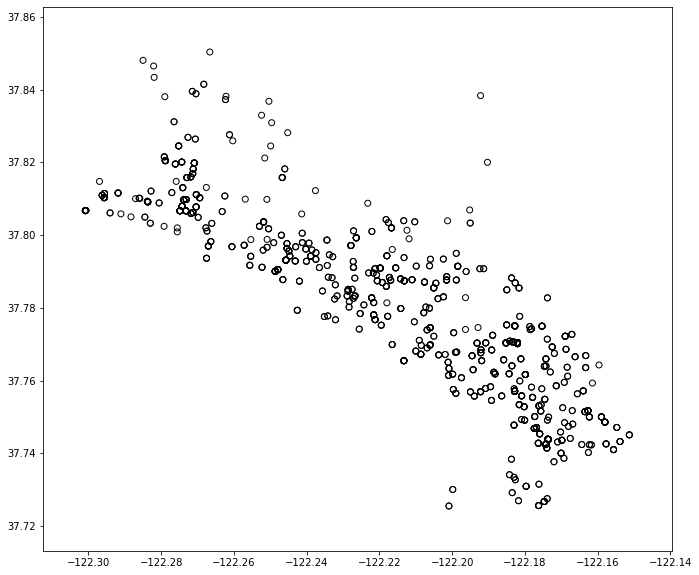

In [99]:
merged_df.plot(color='none', edgecolor='black', linewidth=1, figsize=(14,10))

plt.show()

In [100]:
%%capture
!pip install geoplot;

In [101]:
import geoplot

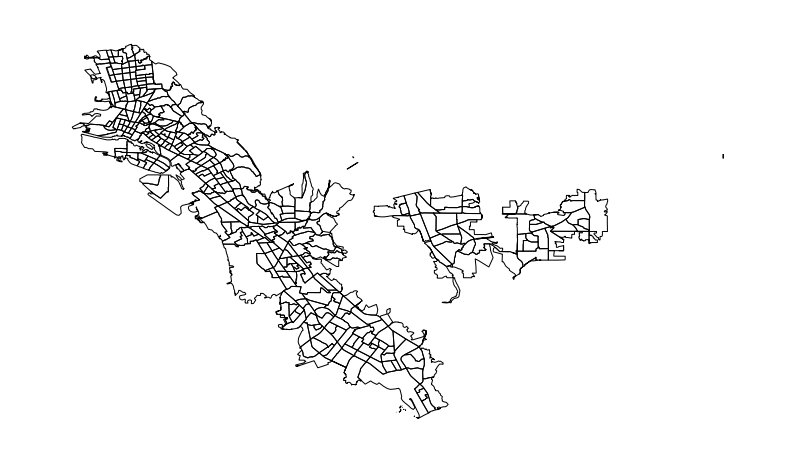

In [79]:
geoplot.polyplot(tracts_shp, figsize=(14,10))

plt.show()

#This is plotting the basic census tracts, I need to get rid of those tracts to the East that are not in Oakland

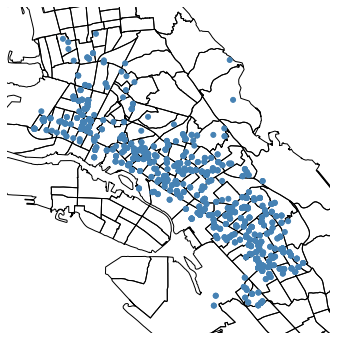

In [102]:
ax = geoplot.polyplot(tracts_shp, projection=geoplot.crs.Robinson())

ax.outline_patch.set_visible(True)  # show the map outline
geoplot.pointplot(merged_df, ax=ax)
plt.show()

#this shows the location of the cases on the map

In [109]:
merged_df[0]
variable = merged_df[0]
variable
# SAM!!! What exactly is '0'? I called 'groupby' on 3 different variables 
#- number of cases per tract, number of each race per tract, and income level per tract
#but each of them produced a column called "O". Or is it even a column?
#the groupby documentation says that it returns an "object", but is that a column?

0       1
1       1
2       1
3       2
4       1
5       2
6       1
7       2
8       3
9       3
10      3
11      1
12      2
13      1
14      2
15      1
16      2
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      4
25      3
26      1
27      2
28      4
29      3
       ..
1173    1
1174    3
1175    1
1176    3
1177    1
1178    3
1179    1
1180    3
1181    2
1182    3
1183    2
1184    3
1185    2
1186    3
1187    2
1188    3
1189    2
1190    3
1191    2
1192    2
1193    2
1194    2
1195    2
1196    2
1197    2
1198    2
1199    4
1200    4
1201    4
1202    4
Name: 0, Length: 1203, dtype: int64

In [112]:
variable.max()

11

In [119]:
# now I'm following directions from here https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
#nvm that doesn't work
vmin, vmax = 0 , 12
    
fig, ax = plt.subplots(1, figsize=(10, 6))

merged_df.plot(column=variable, cmap= ’Blues’, linewidth=0.8, ax=ax, edgecolor=’0.8')

SyntaxError: invalid character in identifier (<ipython-input-119-f81871744098>, line 6)

KeyError: '0'

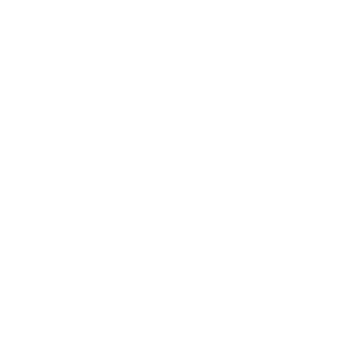

In [139]:
africa = countries.loc[countries.continent == 'Africa']

ax = geoplot.choropleth(africa, hue ='pop_est', legend=True, projection=geoplot.crs.Robinson())
ax.outline_patch.set_visible (True)
ax.set_title( 'Africa')
plt.show